Text(0.5, 1.0, 'Rejection Sampling on Gaussian Mixture Model w/ Gaussian Proposal Distribution')

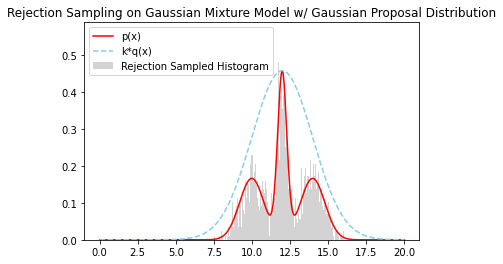

In [ ]:
#Danny Hong, Dan Brody, Arthur Skok
#Project 6: Sampling Methods
#Part 1: Rejection Sampling

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import mean 
from scipy.stats import uniform
from scipy.stats import norm

data_mu = np.array([10, 12, 14])
data_sig = np.array([0.8, 0.3, 0.8])
x_axis = np.linspace(0,20, 1000)

#Functions to generate proposal distribution (q(x)) and Gaussian Mixture Model (p(x))

num_classes = 3
def p(x_axis):
    return (norm.pdf(x_axis, data_mu[0], data_sig[0]) + norm.pdf(x_axis, data_mu[1], data_sig[1]) + norm.pdf(x_axis, data_mu[2], data_sig[2]))/num_classes
def q(x_axis):  
    return norm.pdf(x_axis, 12, 2)

#Generate constant k such that k*q(x) >= p(x)

k = max(p(x_axis) / q(x_axis))

def rejection(N):
    fitted_samples = []

    #z = data
    for i in range(N):

        #z0
        z0 = np.random.normal(12, 2)
        #u0
        u0 = np.random.uniform(0, k*q(z0))
        
        #rejection condition : u0 <= p(z0)

        if u0 <= p(z0):
            fitted_samples.append(z0)

    return np.array(fitted_samples)

px = p(x_axis)

####plotting p(x) against k*q(x) against estimate of p(x)

plt.plot(x_axis, px, color = 'red', label = 'p(x)')
plt.plot(x_axis, k*q(x_axis), '--', color = 'skyblue', label = 'k*q(x)')

#iterating through rejection sampling 1000 times

fitted_samples = rejection(10000)

#setting domain of x-axis for plot

domain = x_axis

#plotting histogram of examples fitted using rejection sampling

plt.hist(fitted_samples, domain, density=True, color='lightgrey', label = "Rejection Sampled Histogram")

plt.legend()
plt.title('Rejection Sampling on Gaussian Mixture Model w/ Gaussian Proposal Distribution')

#For part 1 the GMM (Gaussian Mixture Model) from project 5 was used to obtain samples that 
#converge towards the actual PDF (Probability Distribution Function).
#The algorithm was run for 10,000 iterations. In addition, the algorithm performed 
#decently in terms of speed due to the fact that the samples were randomly selected. 

Text(0, 0.5, 'y')

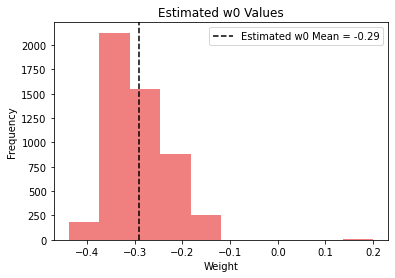

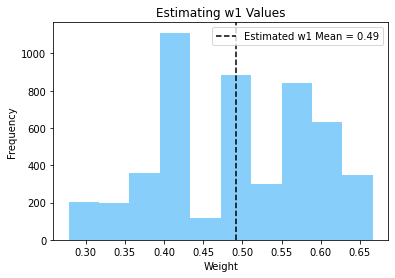

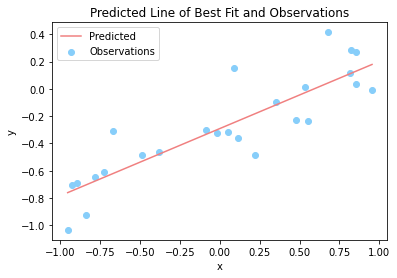

In [ ]:
#Part 2: Re-do Project 2 using MCMC and the Metropolis Algorithm

#Declaring a function to calculate and return the prior
def prior_function(weights):
  prior = np.log(norm(0.5, 0.5).pdf(weights[0])) + np.log(norm(0.5, 0.5).pdf(weights[1]))
  return prior

#Declaring a function to calculate and return the likelihood
def likelihood_function(weights):
  likelihood = np.sum(np.log(norm.pdf(y, weights[0] + weights[1]*x, np.sqrt(1/beta))))
  return likelihood

#Declaring a function to calculate and return the posterior
def posterior_function(weights):
  posterior = np.exp(prior_function(weights) + likelihood_function(weights))
  return posterior

#Actual Values of the weights
a0 = -0.3
a1 = 0.5

#Actual Values for alpha and beta
alpha = 2
beta = 25

#Declaring the total number of observations (samples)
observations = 25

#Creating the data (based off of Project 2)
noise = np.random.normal(0, np.sqrt(1/beta), observations)
x1 = np.sort(np.random.uniform(-1, 1, observations))
y1 = a0 + a1*x1 + noise

#Initial weight estimates (guesses)
current_weights = np.array([0.2, 0.6])
mcmc_samples = current_weights

#Declaring the number of iterations
iterations = 5000

#Applying the Metropolis algorithm from Project 5
for current in range(1, iterations):

  #Posterior for the current weights
  current_posterior = posterior_function(current_weights)

  #Weights from the proposed distribution
  proposed_weights = np.random.normal(current_weights)

  #Posterior for the weights from the proposed distribution
  proposed_posterior = posterior_function(proposed_weights)

  #Applying equation 11.33 to find the acceptance probability
  A = min(1, (proposed_posterior/current_posterior))
  
  #Choosing a random number with uniform distribution over the interval (0, 1) and 
  #then accepting the sample if that number is less than A
  if np.random.uniform(0, 1) < A:
    current_weights = proposed_weights
  
  #Vertically stacking the mcmc_samples array and the current_weights array
  mcmc_samples = np.vstack((mcmc_samples, current_weights))

# Getting the sample means in order to find the weight estimates 
estimated_mean_w0 = (sum(mcmc_samples[:, 0]))/(len(mcmc_samples[:, 0]))
estimated_mean_w1 = (sum(mcmc_samples[:, 1]))/(len(mcmc_samples[:, 1]))

#Plotting the sample histograms for w0
plt.figure()
plt.hist(mcmc_samples[:, 0], color = 'lightcoral')
plt.axvline(x = estimated_mean_w0, linestyle='--', c = 'black', label = f'Estimated w0 Mean = {round(estimated_mean_w0, 2)}')
plt.legend()
plt.title('Estimated w0 Values')
plt.xlabel('Weight')
plt.ylabel('Frequency')

#Plotting the sample histograms for w1
plt.figure()
plt.hist(mcmc_samples[:, 1], color  = 'lightskyblue')
plt.axvline(x = estimated_mean_w1, linestyle='--', c = 'black', label = f'Estimated w1 Mean = {round(estimated_mean_w1, 2)}')
plt.legend()
plt.title('Estimating w1 Values')
plt.xlabel('Weight')
plt.ylabel('Frequency')

#Plotting the predicted line of best fit along with the scatter plot of the data
y2 = estimated_mean_w1*x1 + estimated_mean_w0 # predicted line 
plt.figure()
plt.scatter(x1, y1, label = 'Observations', color = 'lightskyblue') # scatter plot of data 
plt.plot(x1, y2, c = 'lightcoral', label = 'Predicted')
plt.legend()
plt.title('Predicted Line of Best Fit and Observations')
plt.xlabel('x')
plt.ylabel('y')

#For part 2, data from Project 2 was used, and then by using the Metropolis algorithm
#from Project 5, an estimate for the weights can be obtained. The implemented algorithm was run 
#for 5000 iterations, and weight estimates were obtained that were actually very close to the actual weight values. 
#A scatter plot of the observations along with a corresponding line of best fit were plotted as well. 
#As shown, both weights were off by 0.01 (esimated w0 mean: -0.29 vs actual w0 mean:-0.3 and estimated w1 mean: 0.49 vs actual w1 mean: 0.5).
#Overall, this algorithm is pretty slow, which is most likely due to the fact that the proposed sample relies on the current sample, meaning 
#that it will take a lot of iterations to account for all of the weight values. 